<a href="https://colab.research.google.com/github/liminovna/HSE_NLP/blob/main/02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия?

In [ ]:
!mkdir data
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip -P data
!unzip -o data/lenta.txt.zip -d data/

--2024-09-22 18:22:25--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip [following]
--2024-09-22 18:22:25--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5723675 (5.5M) [application/zip]
Saving to: ‘data/lenta.txt.zip’

lenta.txt.zip       100%[===================>]   5.46M  20.5MB/s    in 0.3s    

2024-09-22 18:22:26 (20.5 MB/s) - ‘data/lenta.txt.zip’ 

In [ ]:
# добавить разбиение не предложения чтобы не считать биграмы по границам предложений
corpus = open('data/lenta.txt').read()
corpus[:200]

'Бои у Сопоцкина и Друскеник закончились отступлением германцев. Неприятель, приблизившись с севера к Осовцу начал артиллерийскую борьбу с крепостью. В артиллерийском бою принимают участие тяжелые кали'

In [ ]:
# обновляем nltk, чтобы не выкидывал ошибку Lookup Error
!pip install nltk -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize

from collections import Counter

import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# загружаем список стоп-слов, чтобы питон не ругался на Resource 'corpora/stopwords' not found
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords

# преобразуем в set чтобы быстрее проверять наличие в этом списке стоп слов
russian_stopwords = set(stopwords.words('russian'))

In [ ]:
def ngrammer(tokens, n=2):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

### 1 способ: lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer

In [ ]:
sentences_1 = sent_tokenize(corpus, language='russian')
tokenized_sentences_1 = [word_tokenize(sentence) for sentence in sentences_1]

tokenized_sentences_1[:2]

[['Бои',
  'у',
  'Сопоцкина',
  'и',
  'Друскеник',
  'закончились',
  'отступлением',
  'германцев',
  '.'],
 ['Неприятель',
  ',',
  'приблизившись',
  'с',
  'севера',
  'к',
  'Осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью',
  '.']]

In [ ]:
tokenized_sentences_1 = [
    [token.lower() for token in sentence if not re.match('\W+', token)] for sentence in tokenized_sentences_1
]
tokenized_sentences_1[:2]

[['бои',
  'у',
  'сопоцкина',
  'и',
  'друскеник',
  'закончились',
  'отступлением',
  'германцев'],
 ['неприятель',
  'приблизившись',
  'с',
  'севера',
  'к',
  'осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью']]

In [ ]:
pentagram_counts_1 = Counter()
for sentence in tokenized_sentences_1:
    pentagram_counts_1.update(ngrammer(tokens=[token for token in sentence if token not in russian_stopwords],n=5))

pentagram_counts_1.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

### 2 способ: lenta.txt -> word_tokenize(preserve_line=True) -> ngrammer

In [ ]:
tokenized_text_2 = word_tokenize(corpus, language='russian', preserve_line=True)
tokenized_text_2[:10]

['Бои',
 'у',
 'Сопоцкина',
 'и',
 'Друскеник',
 'закончились',
 'отступлением',
 'германцев.',
 'Неприятель',
 ',']

In [ ]:
tokenized_text_2 = [
    token.lower() for token in tokenized_text_2 if not re.match('\W+', token)
]
tokenized_text_2[:10]

['бои',
 'у',
 'сопоцкина',
 'и',
 'друскеник',
 'закончились',
 'отступлением',
 'германцев.',
 'неприятель',
 'приблизившись']

In [ ]:
pentagram_counts_2 = Counter()
pentagram_counts_2.update(ngrammer(tokens=list(filter(lambda t: t not in russian_stopwords, tokenized_text_2)), n=5))
pentagram_counts_2.most_common(20)

[('сообщает риа новости ссылкой пресс-службу', 57),
 ('объединенной группировки войск северном кавказе', 56),
 ('обязанности президента россии владимир путин', 46),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 29),
 ('объединенной группировки войск северном кавказе.', 27),
 ('министр иностранных дел россии игорь', 24),
 ('штабе объединенной группировки федеральных сил', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('помощник президента россии сергей ястржембский', 21),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('группировки федеральных сил северном кавказе', 20),
 ('заместитель начальника генштаба вооруженных сил', 20),
 ('сообщает федеральное агентство новостей ссылкой'

### Вывод

Топ-20 пентаграмм, полученные обоими способами, отличаются предположительно потому, что в первом способе при делении корпуса сначала на предложения, а потом -- на токены, знаки пунктуации в конце предложения удалялись, и словоформа, стоящая в конце предложения была равна словоформе, стоящей, например, в середине. Во втором способе знаки препинания, наоборот, сохранялись на конце последнего токена в предложении, делая этот токен отличным о той же словоформы, которая стояла в середине предложения.

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

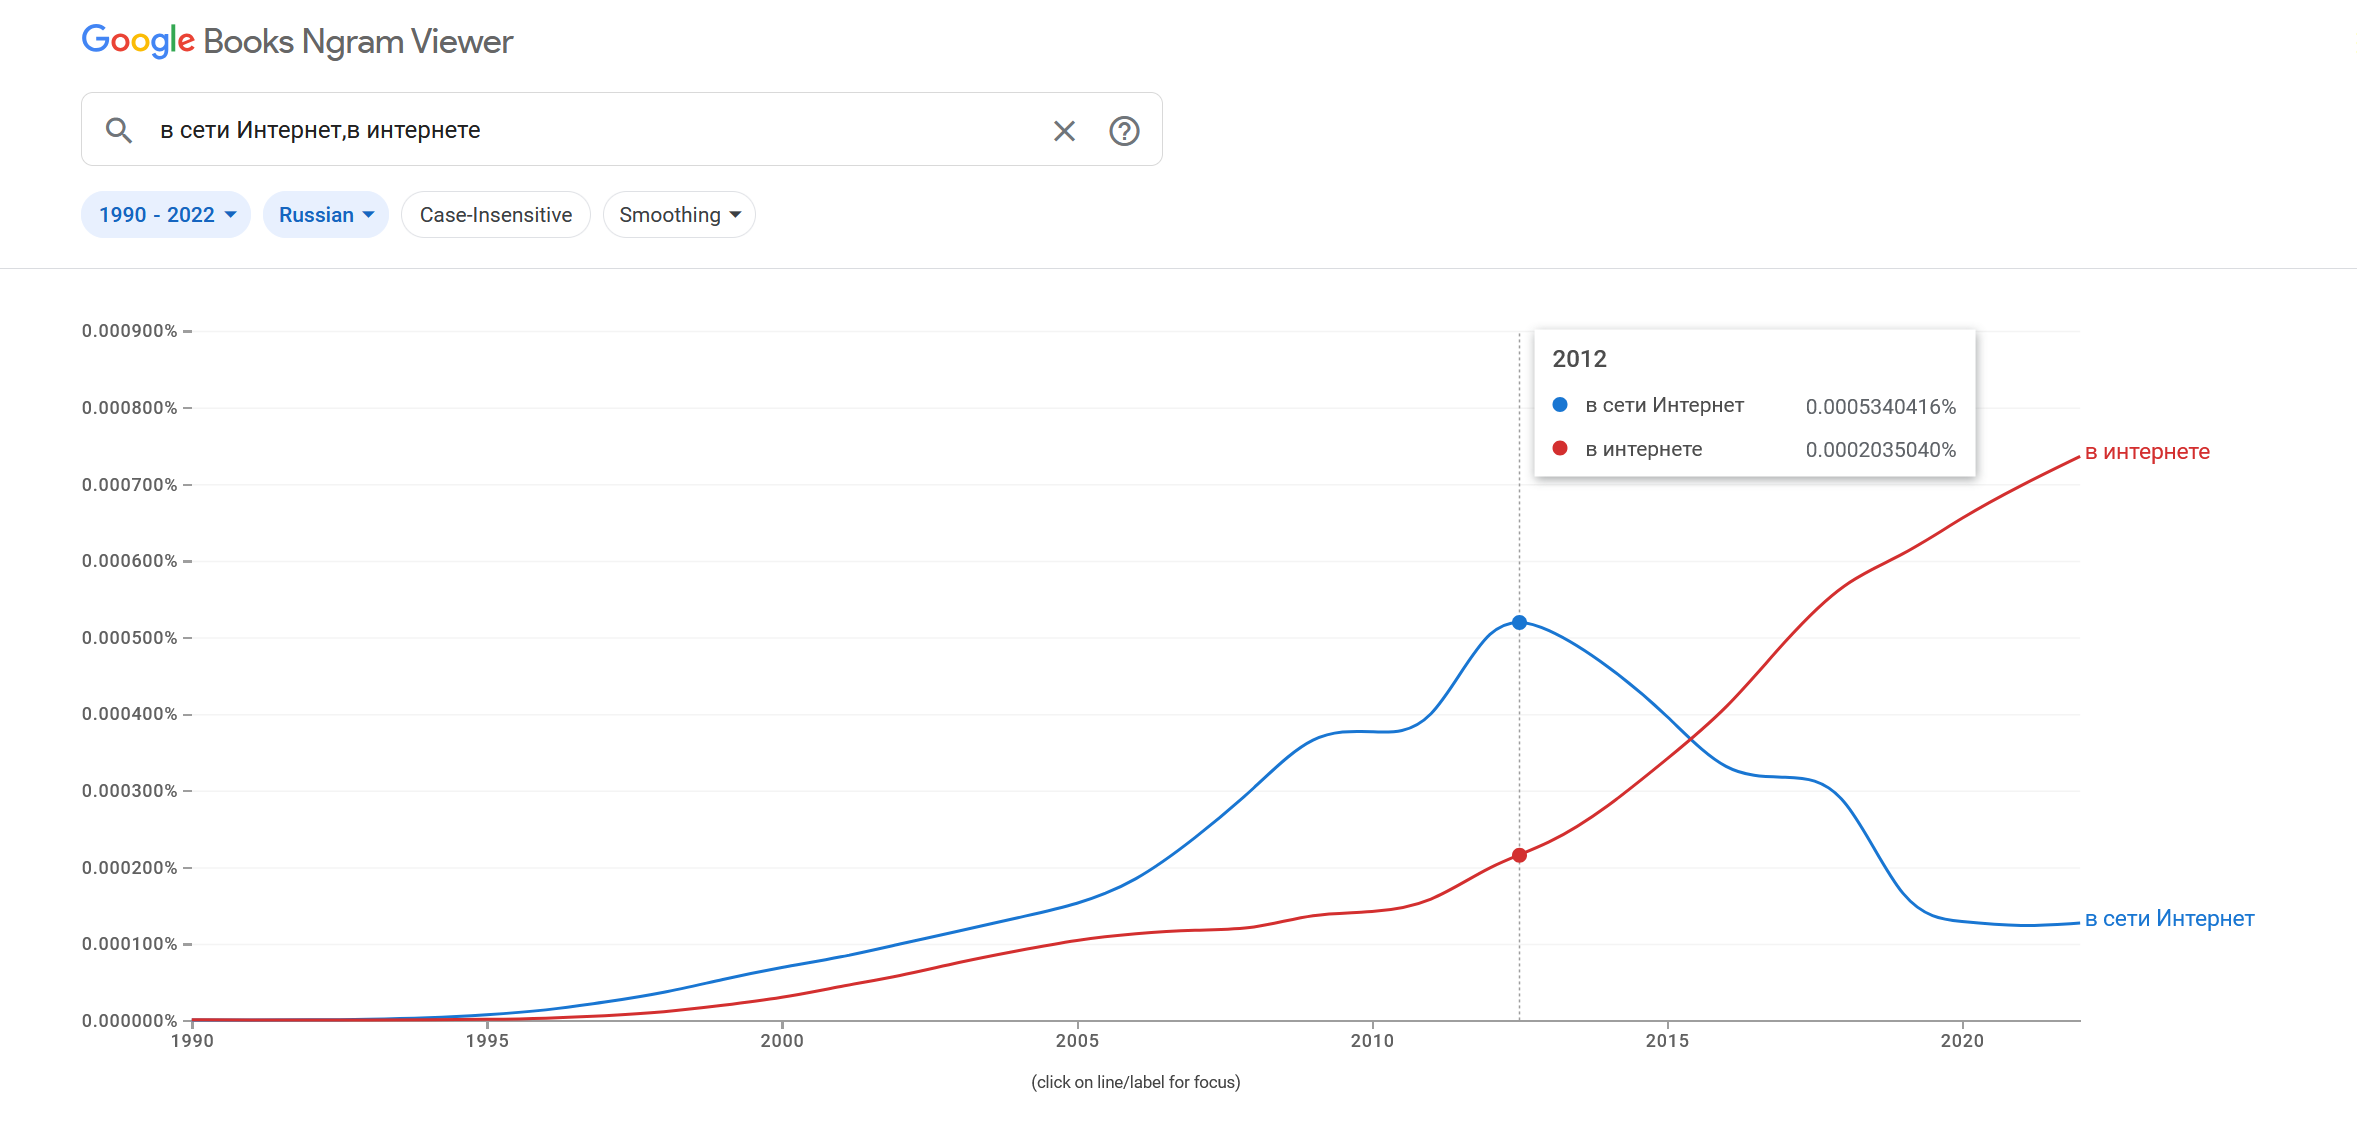

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [ ]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [ ]:
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [ ]:
def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов

    unigrams = Counter()
    bigrams = Counter()

    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))

    return unigrams, bigrams

In [ ]:
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000):
    # суммпрное число токенов
    tokens_total=sum(unigrams.values())

    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()

    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(
            unigrams[word_a],
            unigrams[word_b],
            bigrams[bigram],
            tokens_total
        )

        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

In [ ]:
unigrams, bigrams = collect_stats(tokenized_sentences_1, russian_stopwords)
bigram2score_simple = score_bigrams(unigrams, bigrams, scorer_simple)

bigram2score_simple.most_common(10)

[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5)]

In [ ]:
from math import log

# обновленная функция
def scorer_proper(word_count_a, word_count_b, bigram_count, tokens_total=0, min_count=0):
  if bigram_count > min_count:
    try:
        jointproba_a_b = bigram_count/tokens_total # как часто два слова встречаются вместе / количество токенов в тексте
        proba_a = word_count_a/tokens_total
        proba_b = word_count_b/tokens_total
        score = log(
            jointproba_a_b / (proba_a * proba_b),
            2
        )
    except ZeroDivisionError:
        return 0
    return score
  return 0

In [ ]:
# unigrams, bigrams = collect_stats(tokenized_sentences_1, russian_stopwords)
bigram2score_proper = score_bigrams(unigrams, bigrams, scorer_proper)
bigram2score_proper.most_common(10)

[('сопоцкина друскеник', 20.510568127854185),
 ('неприятель приблизившись', 20.510568127854185),
 ('саноку обстреливалась', 20.510568127854185),
 ('м.ю лермонтова', 20.510568127854185),
 ('австрийский аэроплан', 20.510568127854185),
 ('показывался аэроплан-птица', 20.510568127854185),
 ('das ist', 20.510568127854185),
 ('ist nesteroff', 20.510568127854185),
 ('песнь нестерове', 20.510568127854185),
 ('могучий унесся', 20.510568127854185)]

## Задание 4*

Обновите функцию, получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов.

In [ ]:
# обновленная обновленная функция
def scorer_proper_v2(word_count_a, word_count_b, bigram_count, tokens_total=0, min_count=0):
  if bigram_count > min_count:
    try:
        jointproba_a_b = bigram_count/tokens_total # как часто два слова встречаются вместе / количество токенов в тексте
        proba_a = word_count_a/tokens_total
        proba_b = word_count_b/tokens_total
        # score = log(
        #     jointproba_a_b / (proba_a * proba_b),
        #     2
        # )
        score = log(jointproba_a_b,2) - (log(proba_a,2) + log(proba_b,2))
    except ZeroDivisionError:
        return 0
    return score
  return 0

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [ ]:
import gensim

In [ ]:
# согласно документации, есть две scoring-функции:
#     ”default” - original_scorer().
#     ”npmi” - npmi_scorer().